<a href="https://colab.research.google.com/github/CourtneyBrookes/ProblemSet2/blob/main/ProblemSet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load RGB image from URL, Resize image, Show grayscale copy**

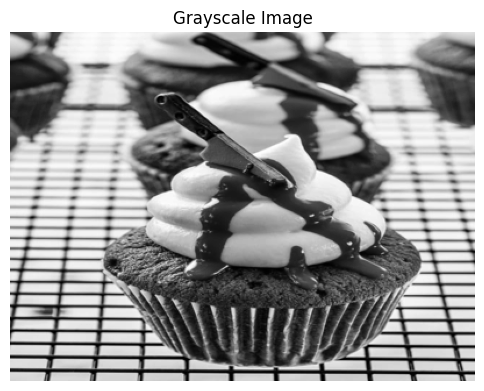

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

# Load the image from the URL
url = "https://www.jocooks.com/wp-content/uploads/2017/10/halloween-red-velvet-cupcakes-1.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Resize the image
new_size = (400, 300)
img = img.resize(new_size)

# Convert to grayscale
img_gray = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)

# Show the grayscale image
plt.figure(figsize=(6, 6))
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')
plt.show()

**Convolve with 10 random filters and show filters and features maps for each**

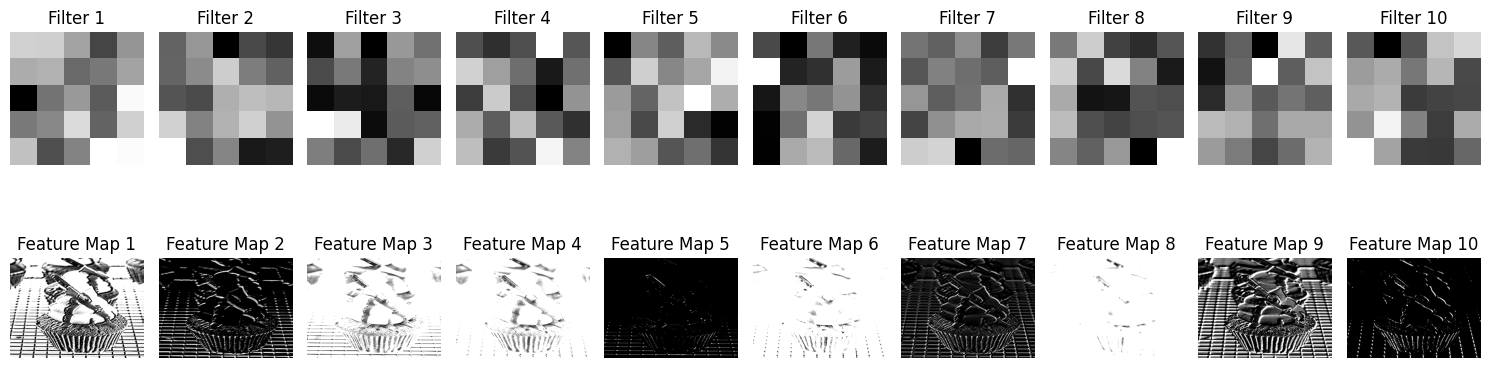

In [12]:
# Function to generate random filters
def generate_random_filters(num_filters, size):
    filters = []
    for _ in range(num_filters):
        rand_filter = np.random.randn(size, size)
        filters.append(rand_filter)
    return filters

# Convolve with random filters and show the results
num_filters = 10
filter_size = 5
filters = generate_random_filters(num_filters, filter_size)

plt.figure(figsize=(15, 5))

for i, filter in enumerate(filters):
    feature_map = cv2.filter2D(img_gray, -1, filter)
    plt.subplot(2, num_filters, i + 1)
    plt.imshow(filter, cmap='gray')
    plt.title(f'Filter {i + 1}')
    plt.axis('off')

    plt.subplot(2, num_filters, i + 1 + num_filters)
    plt.imshow(feature_map, cmap='gray')
    plt.title(f'Feature Map {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

**Create .md markdown report**

In [13]:
markdown_report = """
# Image Processing Report

## Original Image
![Original Image]({})

## Grayscale Image
![Grayscale Image]({})

## Convolution with Random Filters
""".format(url, 'grayscale_image.png')

for i, filter in enumerate(filters):
    feature_map = cv2.filter2D(img_gray, -1, filter)
    cv2.imwrite(f'feature_map_{i}.png', feature_map)
    markdown_report += f"### Filter {i + 1}\n![Filter {i + 1}](feature_map_{i}.png)\n"

with open('image_processing_report.md', 'w') as file:
    file.write(markdown_report)

print("Markdown report created successfully.")

Markdown report created successfully.
